### **Introduction:**



In the realm of ridesharing services, understanding and predicting the historical cost of rides is crucial for ensuring efficient operations and customer satisfaction. With the advent of data analytics and machine learning, companies can leverage historical data to develop predictive models that accurately forecast ride costs. This project aims to tackle this challenge by developing and optimizing machine learning models to predict the historical cost of rides in a ridesharing service.

The project begins by preprocessing the dataset, which includes splitting the data into features and the target variable, as well as dividing it into training, validation, and testing sets. Next, various machine learning models, including XGBoost, Random Forest, and Bagging Regressor, are trained on the training data and evaluated on the testing set to establish baseline performance metrics.

Following the baseline model evaluation, hyperparameter tuning is performed to optimize the models further. Grid search techniques are employed to find the best combination of hyperparameters for each model, enhancing their predictive capabilities. The performance of the optimized models is then compared with the baseline models to assess improvements.

In addition to optimizing individual models, a meta-model is created by aggregating predictions from the optimized base models. This meta-model is trained on the test set to combine the strengths of multiple models and enhance predictive accuracy. Hyperparameter tuning is also conducted for the meta-model to identify the optimal configuration.

Finally, the performance of the optimized meta-model is evaluated on the test set, and its effectiveness in predicting ride costs is assessed using key metrics such as Root Mean Square Error (RMSE) and R² score. The project concludes by discussing the implications of the findings on dynamic pricing strategies in ridesharing services and the potential benefits for stakeholders.

In [258]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## EDA

In [260]:
# Loading data
data = pd.read_csv("/content/drive/MyDrive/Dynamic Pricing on Cab Booking Data/dynamic_pricing.csv")
import pandas as pd

# Drop the 'Number_of_Riders' column
data.drop(columns=['Number_of_Riders'], inplace=True)

# Rename the 'Average_Ratings' column
data.rename(columns={'Average_Ratings': 'Approx_Rating_of_Booked_Driver'}, inplace=True)

# Display the updated DataFrame
print(data.head())

   Number_of_Drivers Location_Category Customer_Loyalty_Status  \
0                 45             Urban                  Silver   
1                 39          Suburban                  Silver   
2                 31             Rural                  Silver   
3                 28             Rural                 Regular   
4                 22             Rural                 Regular   

   Number_of_Past_Rides  Approx_Rating_of_Booked_Driver Time_of_Booking  \
0                    13                            4.47           Night   
1                    72                            4.06         Evening   
2                     0                            3.99       Afternoon   
3                    67                            4.31       Afternoon   
4                    74                            3.77       Afternoon   

  Vehicle_Type  Expected_Ride_Duration  Historical_Cost_of_Ride  
0      Premium                      90               284.257273  
1      Economy      

In [261]:
data.sample(10)

,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Approx_Rating_of_Booked_Driver,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
499,28,Rural,Gold,30,3.93,Evening,Premium,42,157.106572
349,21,Urban,Regular,85,4.21,Morning,Premium,146,474.917162
217,71,Suburban,Gold,88,3.84,Morning,Economy,167,451.684865
412,29,Urban,Gold,67,4.49,Afternoon,Economy,125,421.817188
696,24,Urban,Regular,83,3.61,Night,Economy,13,48.928953
246,5,Rural,Silver,93,4.85,Evening,Economy,99,424.927510
410,37,Suburban,Regular,94,3.83,Night,Economy,28,124.645503
168,36,Suburban,Gold,18,4.61,Night,Economy,145,572.242049
220,62,Suburban,Silver,54,3.78,Morning,Economy,114,339.662304
294,80,Urban,Regular,47,3.77,Morning,Economy,70,177.203066


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Number_of_Drivers               1000 non-null   int64  
 1   Location_Category               1000 non-null   object 
 2   Customer_Loyalty_Status         1000 non-null   object 
 3   Number_of_Past_Rides            1000 non-null   int64  
 4   Approx_Rating_of_Booked_Driver  1000 non-null   float64
 5   Time_of_Booking                 1000 non-null   object 
 6   Vehicle_Type                    1000 non-null   object 
 7   Expected_Ride_Duration          1000 non-null   int64  
 8   Historical_Cost_of_Ride         1000 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [263]:
data.describe()

,Number_of_Drivers,Number_of_Past_Rides,Approx_Rating_of_Booked_Driver,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,27.076000,50.031000,4.257220,99.58800,372.502623
std,19.068346,29.313774,0.435781,49.16545,187.158756
min,5.000000,0.000000,3.500000,10.00000,25.993449
25%,11.000000,25.000000,3.870000,59.75000,221.365202
50%,22.000000,51.000000,4.270000,102.00000,362.019426
75%,38.000000,75.000000,4.632500,143.00000,510.497504
max,89.000000,100.000000,5.000000,180.00000,836.116419


In [264]:
data.isnull().sum()

Number_of_Drivers                 0
Location_Category                 0
Customer_Loyalty_Status           0
Number_of_Past_Rides              0
Approx_Rating_of_Booked_Driver    0
Time_of_Booking                   0
Vehicle_Type                      0
Expected_Ride_Duration            0
Historical_Cost_of_Ride           0
dtype: int64

In lack of a complete coloumn description we need to make some assumptions. For the further analysis we assume the following:


Number_of_Drivers: The number of drivers available at the time of booking, reflecting the market situation.<br>
Location_Category: The category representing the geographical location where the ride was booked, such as Urban, Suburban, or Rural.<br>
Customer_Loyalty_Status: The loyalty status of the customer towards the ride-sharing company, indicating whether the customer is a regular user or enrolled in a loyalty program.<br>
Number_of_Past_Rides: The number of past rides taken by the customer, indicating their experience and familiarity with the service.<br>
Approx_Rating_of_Booked_Driver: The average rating given by the customer for past rides on the booked driver , reflecting customer satisfaction and feedback.<br>
Time_of_Booking: The time of the day when the ride was booked, categorized into different time slots such as Morning, Afternoon, Evening, or Night.<br>
Vehicle_Type: The type of vehicle used for the ride, such as Premium, Economy, or other classes.<br>
Expected_Ride_Duration: The expected duration of the ride in minutes.<br>
Historical_Cost_of_Ride: The historical cost of past rides, indicating pricing patterns and customer spending.<br>




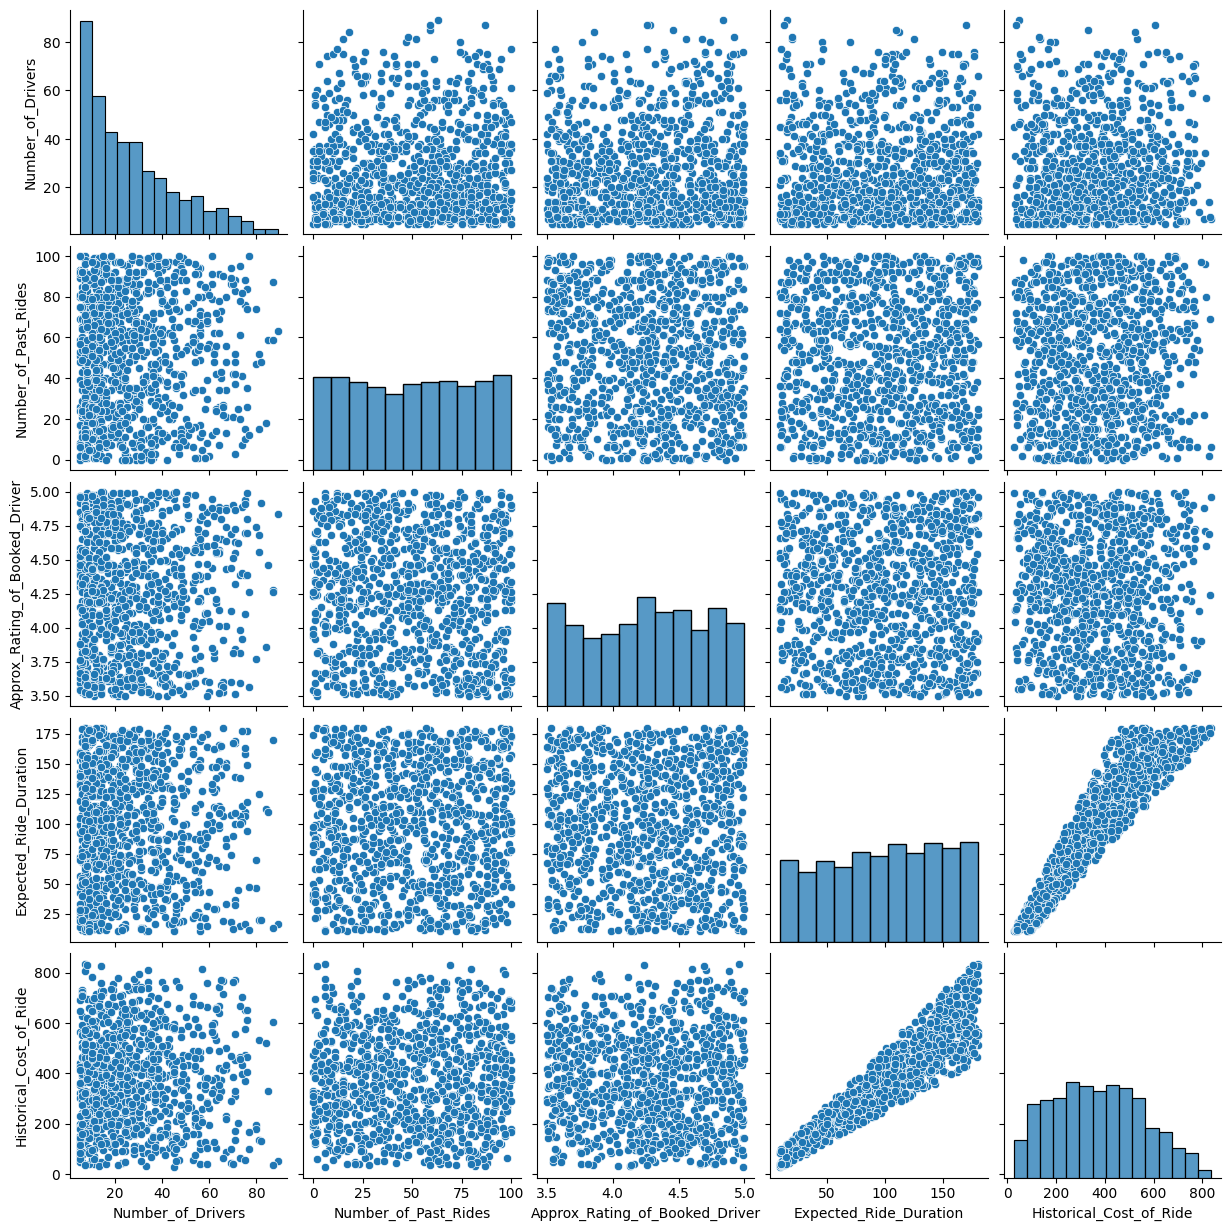

In [265]:
numerical_data = data[['Number_of_Drivers', 'Number_of_Past_Rides', 'Approx_Rating_of_Booked_Driver'
                       , 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']]

sns.pairplot(numerical_data, diag_kind='hist')
plt.show()

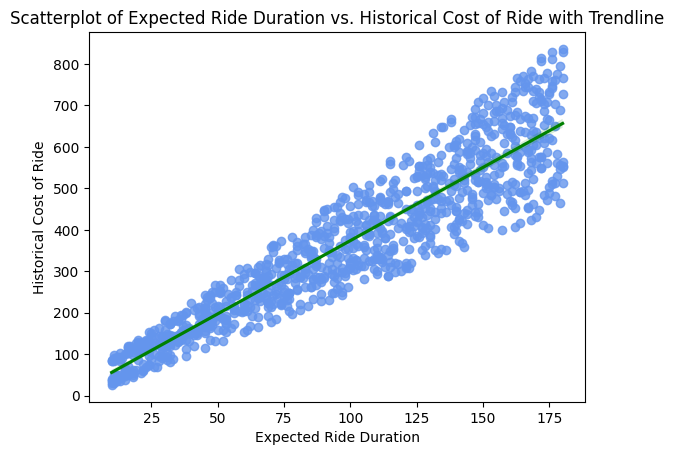

In [266]:
sns.regplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=data,
            scatter=True, color='cornflowerblue', line_kws={"color": "green"})

plt.title('Scatterplot of Expected Ride Duration vs. Historical Cost of Ride with Trendline')
plt.xlabel('Expected Ride Duration')
plt.ylabel('Historical Cost of Ride')
plt.show()

This Scatterplot shows that there is a Linearity existing between Expected Ride Duration and Historical Cost of Ride which might be useful for linearity following models. Which is then confirmed by the below Correlation matrix :

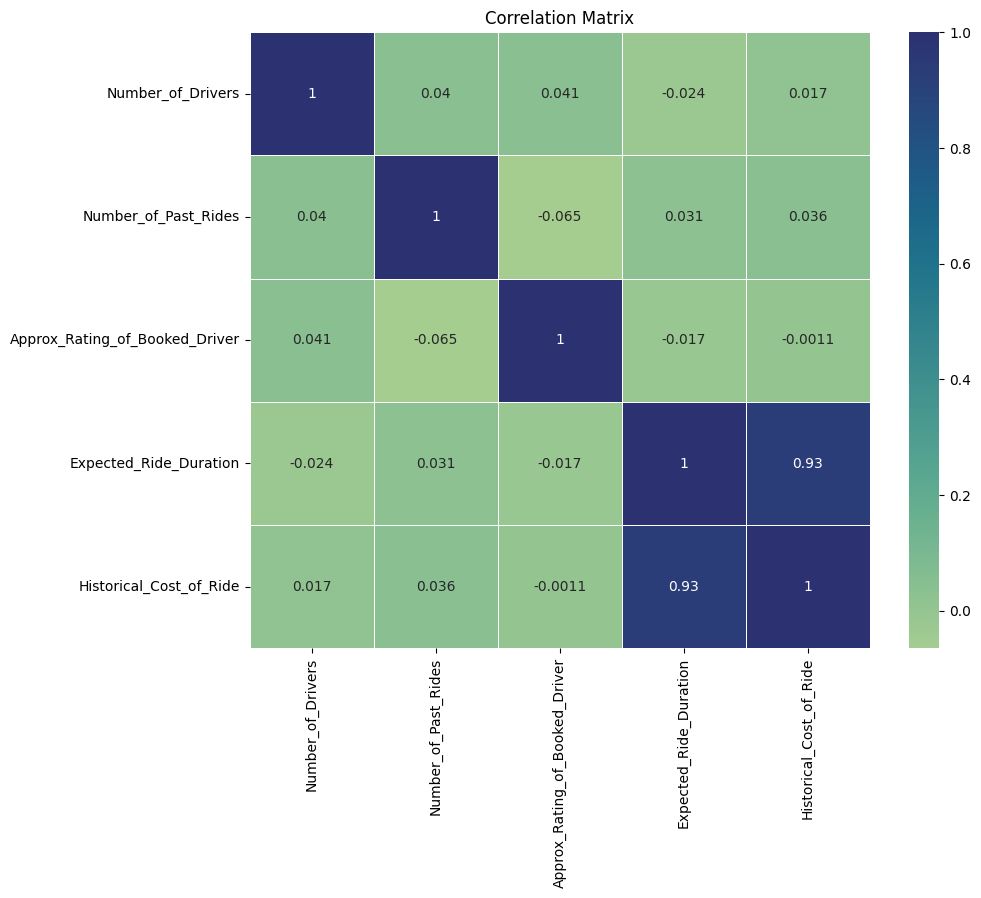

In [267]:
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 1.** Data Preparation:**

The dataset was split into features (X) and the target variable (y).
The data was then split into training, validation, and testing sets using an 80-20 split for training-testing and an 80-20 split for training-validation.

In [268]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target variable (y)
X = data.drop(columns=['Historical_Cost_of_Ride'])
y = data['Historical_Cost_of_Ride']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training set into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (640, 8) (640,)
Validation set shape: (160, 8) (160,)
Testing set shape: (200, 8) (200,)


## Preprocessing

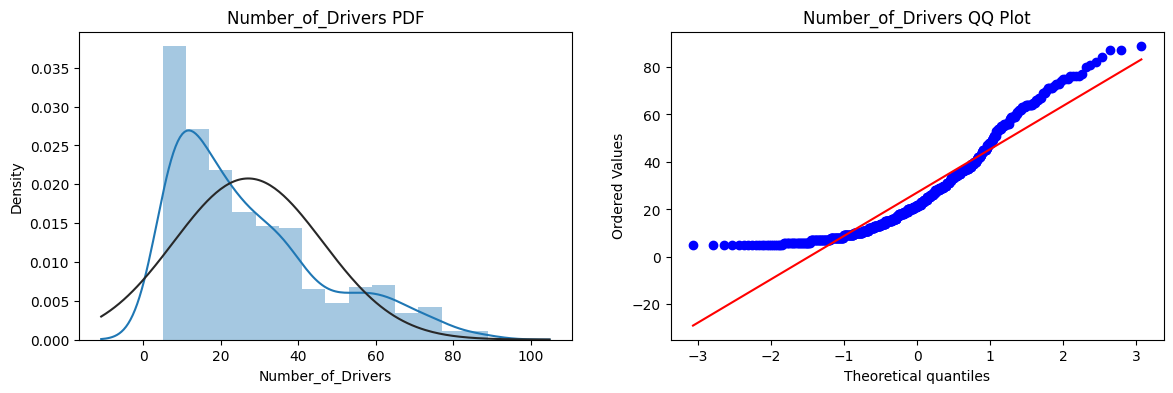

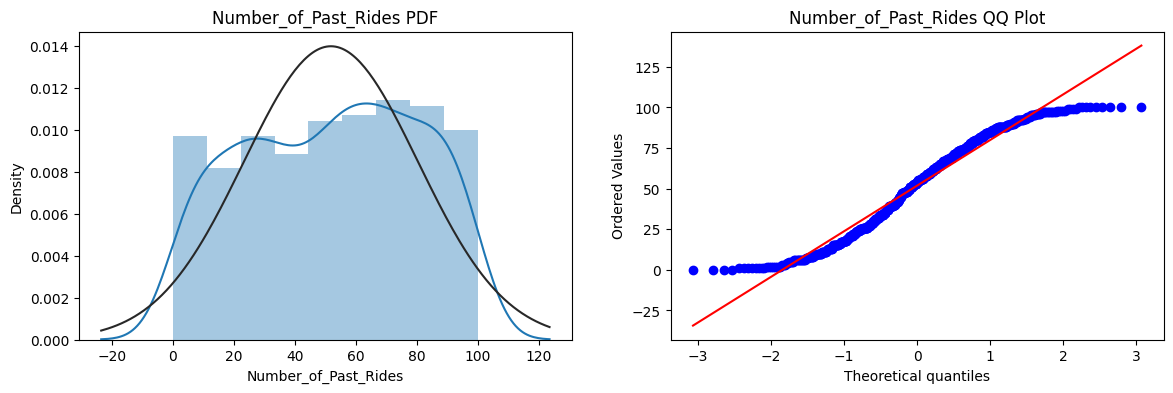

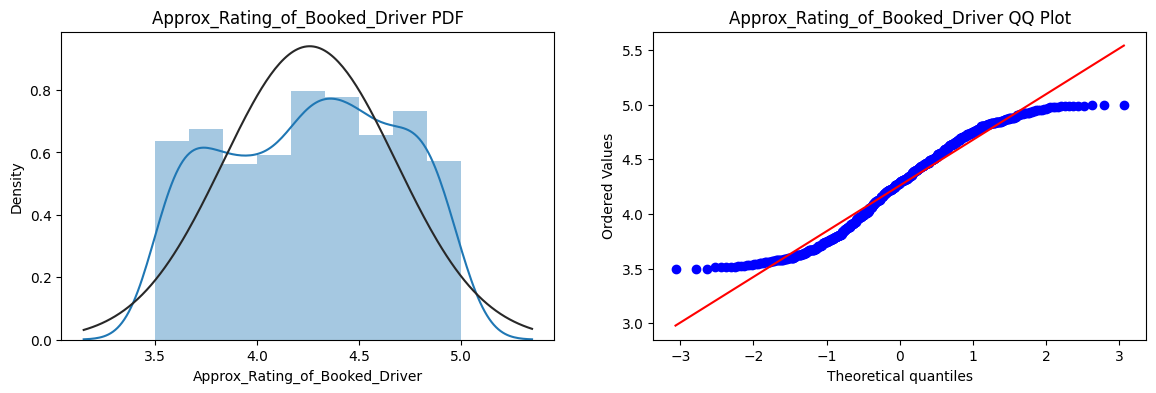

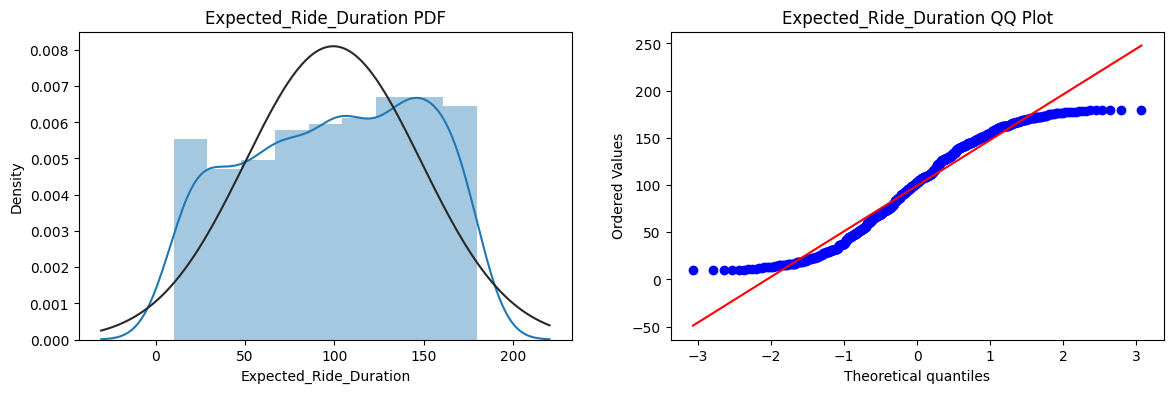

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Get numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Plot QQ plots and PDFs for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(14, 4))

    # Plot PDF
    plt.subplot(121)
    sns.distplot(X_train[col], fit=stats.norm)
    plt.title(f'{col} PDF')

    # Plot QQ plot
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f'{col} QQ Plot')

    plt.show()

** But here we can see that all the columns are not Normally Distributed and hence this could be a problem to the linearly following models like Linear Regression or Logistic Regression. So we would not use such models later onn. **

In [270]:
# Unique values of Location_Category
unique_location_categories = data['Location_Category'].unique()
print("Unique Location Categories:", unique_location_categories)

# Unique values of Customer_Loyalty_Status
unique_customer_loyalty_statuses = data['Customer_Loyalty_Status'].unique()
print("Unique Customer Loyalty Statuses:", unique_customer_loyalty_statuses)

# Unique values of Vehicle_Type
unique_vehicle_types = data['Vehicle_Type'].unique()
print("Unique Vehicle Types:", unique_vehicle_types)

# Unique values of Time_of_Booking
unique_time_of_booking = data['Time_of_Booking'].unique()
print("Unique Time_of_Booking:", unique_time_of_booking)

Unique Location Categories: ['Urban' 'Suburban' 'Rural']
Unique Customer Loyalty Statuses: ['Silver' 'Regular' 'Gold']
Unique Vehicle Types: ['Premium' 'Economy']
Unique Time_of_Booking: ['Night' 'Evening' 'Afternoon' 'Morning']


In [271]:
X_train.sample(10)

,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Approx_Rating_of_Booked_Driver,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration
927,10,Rural,Silver,5,4.44,Morning,Premium,129
189,8,Suburban,Regular,69,3.86,Evening,Premium,175
919,13,Urban,Silver,54,4.09,Morning,Economy,161
118,23,Suburban,Silver,34,4.23,Evening,Premium,125
561,16,Suburban,Gold,26,4.18,Morning,Economy,32
593,66,Rural,Silver,26,3.56,Evening,Economy,19
707,5,Suburban,Regular,53,3.67,Evening,Premium,48
202,26,Urban,Gold,54,4.60,Night,Premium,52
653,76,Suburban,Gold,26,4.70,Morning,Premium,94
155,29,Urban,Regular,84,3.65,Night,Economy,176


# **Data Preprocessing and Modeling:**

A preprocessing pipeline was created using OneHotlEncoder for encoding categorical features.
Base model pipelines were defined using XGBRegressor, RandomForestRegressor, and BaggingRegressor.
Each pipeline included a preprocessing step and a model step.
These pipelines were trained on the training data and evaluated on the test set to compare their performance using RMSE and R² metrics.
Base Model Results on Test Set.

In [272]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Convert transformed data back into DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=X_val.columns)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=X_test.columns)

# Define OrdinalEncoder transformation step for remaining categorical features
ordinal_encoder = OneHotEncoder(drop='first', sparse=False)

# Define individual pipelines for each base model
base_model_pipelines = {
    "XGBoost": Pipeline([
        ('preprocessor', ColumnTransformer([
            ('ordinal_encoder', ordinal_encoder, ['Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type', 'Time_of_Booking'])
        ], remainder='passthrough')),
        ('xgb', XGBRegressor())
    ]),
    "Random Forest": Pipeline([
        ('preprocessor', ColumnTransformer([
            ('ordinal_encoder', ordinal_encoder, ['Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type', 'Time_of_Booking'])
        ], remainder='passthrough')),
        ('rf', RandomForestRegressor())
    ]),
    "Bagging Regressor": Pipeline([
        ('preprocessor', ColumnTransformer([
            ('ordinal_encoder', ordinal_encoder, ['Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type', 'Time_of_Booking'])
        ], remainder='passthrough')),
        ('bagging', BaggingRegressor(base_estimator=GradientBoostingRegressor()))
    ])
}

# Dictionary to store evaluation metrics for each base model
base_model_results = {}

# Train each base model and evaluate on the validation set
for model_name, pipeline in base_model_pipelines.items():
    pipeline.fit(X_train_transformed_df, y_train)
    y_pred_val = pipeline.predict(X_val_transformed_df)
    y_pred_test = pipeline.predict(X_test_transformed_df)
    rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
    r2_val = r2_score(y_val, y_pred_val)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    r2_test = r2_score(y_test, y_pred_test)
    base_model_results[model_name] = {"RMSE (Validation)": rmse_val, "R² (Validation)": r2_val,
                                      "RMSE (Test)": rmse_test, "R² (Test)": r2_test}

# Construct a DataFrame to compare the performance of all base models
base_model_comparison_df = pd.DataFrame(base_model_results).transpose()

print(base_model_comparison_df)


                   RMSE (Validation)  R² (Validation)  RMSE (Test)  R² (Test)
XGBoost                    72.313643         0.844046    78.283300   0.831922
Random Forest              69.564582         0.855678    76.844945   0.838041
Bagging Regressor          70.298027         0.852619    70.686642   0.862960


Base Model Results on Test Set:

XGBoost: RMSE = 78.28, R² = 0.83
Random Forest: RMSE = 76.84, R² = 0.84
Bagging Regressor: RMSE = 70.69, R² = 0.86

This shows that the Bagging Regressor I had used with modification to it`s base estimator as Gradient Boosting Regressor is outperforming the other models.

# **Hyperparameter Tuning:**


Grid search was performed to find the best hyperparameters for each base model using GridSearchCV.
Parameter grids for hyperparameter tuning were defined for each base model.
Grid search was applied to each base model pipeline to find the best combination of hyperparameters using 5-fold cross-validation.
The best hyperparameters for each model were printed and used to create optimized models.

In [273]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Convert X_train_transformed numpy array back to a DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# Define parameter grids for each base model
param_grids = {
    "XGBoost": {
        'xgb__n_estimators': [50, 100, 150],
        'xgb__learning_rate': [0.01, 0.1, 0.3],
        'xgb__max_depth': [3, 5, 7]
    },
    "Random Forest": {
        'rf__n_estimators': [50, 100, 150],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 5, 10]
    },
    "Bagging Regressor": {}  # No hyperparameters to tune for Bagging Regressor
}

# Define pipelines for hyperparameter tuning
hyperparameter_tuning_pipelines = {}
for model_name, pipeline in base_model_pipelines.items():
    hyperparameter_tuning_pipelines[model_name] = Pipeline([
        ('model', GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', verbose=1))
    ])

# Fit the hyperparameter tuning pipelines
best_params = {}
for model_name, pipeline in hyperparameter_tuning_pipelines.items():
    pipeline.fit(X_train_transformed_df, y_train)
    best_params[model_name] = pipeline.named_steps['model'].best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


Best Hyperparameters:

XGBoost: n_estimators = 50, learning_rate = 0.01, max_depth = 3
Random Forest: n_estimators = 50, max_depth = None, min_samples_split = 2
Bagging Regressor: No hyperparameters to tune

In [274]:
# Print the best hyperparameters obtained
for model_name, params in best_params.items():
    print(f"Best hyperparameters for {model_name}: {params}")

Best hyperparameters for XGBoost: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 50}
Best hyperparameters for Random Forest: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Best hyperparameters for Bagging Regressor: {}


In [275]:
# Extract the relevant parameters for Random Forest
rf_params = {
    key.replace("rf__", ""): value for key, value in best_params["Random Forest"].items()
}

# Define base models with optimized hyperparameters
base_models_optimized = {
    "XGBoost": XGBRegressor(**best_params["XGBoost"]),
    "Random Forest": RandomForestRegressor(**rf_params),
    "Bagging Regressor": BaggingRegressor(base_estimator=GradientBoostingRegressor(), **best_params["Bagging Regressor"])
}

# **Base Model Evaluation:**

The optimized base models were evaluated on the test set to assess their
performance using RMSE and R² metrics.
The performance of each model before and after hyperparameter tuning was compared to observe improvements.

In [276]:
# Dictionary to store evaluation metrics for each base model with optimized hyperparameters
base_model_results_optimized = {}

# Train each base model with optimized hyperparameters and evaluate on the test set
for model_name, model in base_models_optimized.items():
    model.fit(X_train_transformed_df, y_train)
    y_pred_test = model.predict(X_test_transformed)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    r2_test = r2_score(y_test, y_pred_test)
    base_model_results_optimized[model_name] = {"RMSE (Test)": rmse_test, "R² (Test)": r2_test}

# Construct a DataFrame to compare the performance of all base models with optimized hyperparameters
base_model_comparison_df_optimized = pd.DataFrame(base_model_results_optimized).transpose()
print(base_model_comparison_df_optimized)

                   RMSE (Test)  R² (Test)
XGBoost              75.902425   0.841990
Random Forest        74.716802   0.846888
Bagging Regressor    73.732981   0.850893


# **Optimized Base Model Results on Test Set:**

XGBoost: RMSE = 75.90, R² = 0.84
Random Forest: RMSE = 74.72, R² = 0.85
Bagging Regressor: RMSE = 73.73, R² = 0.85

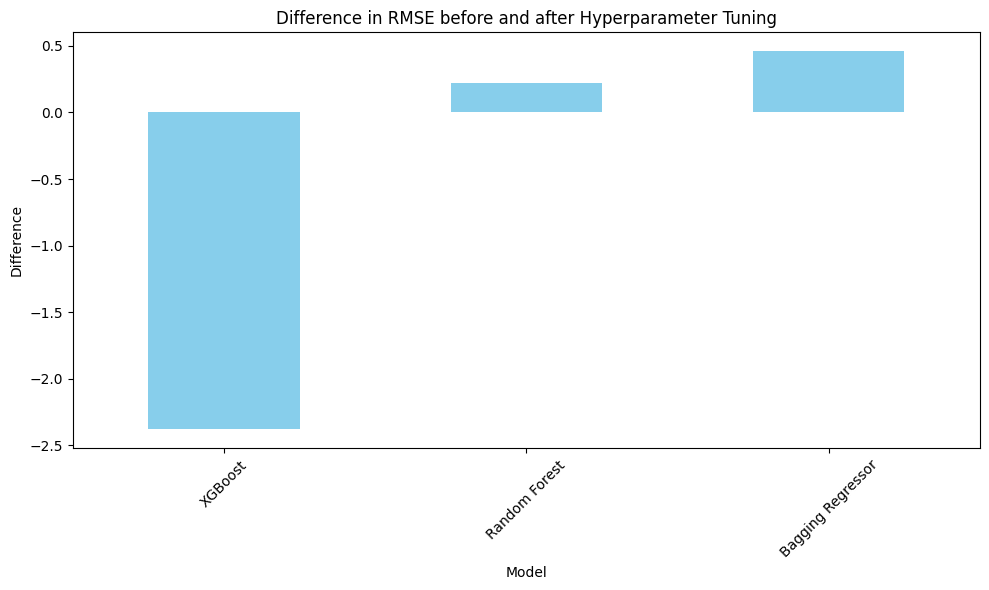

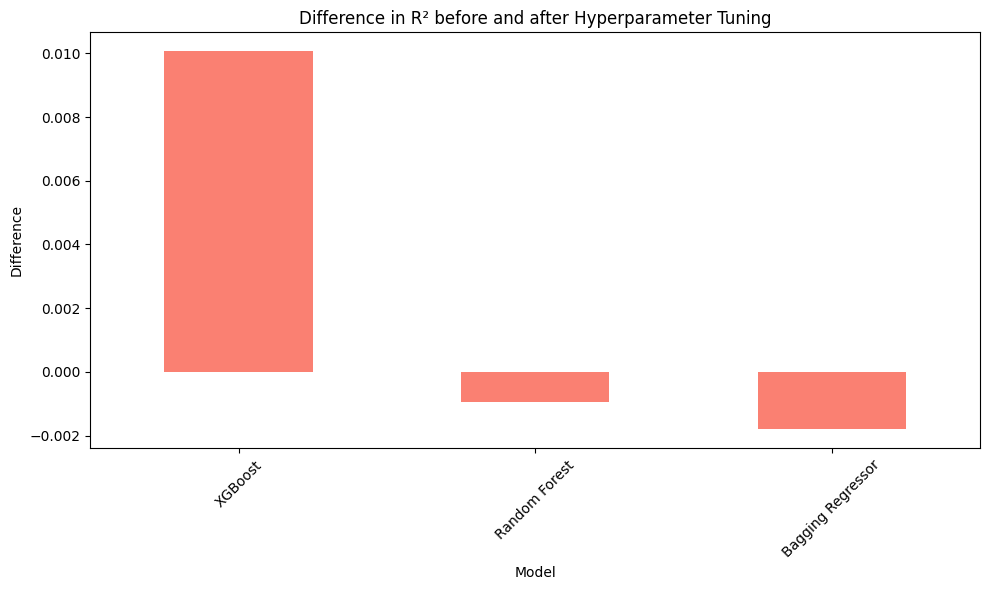

Difference in Test Metrics before and after Hyperparameter Tuning:
                   RMSE (Test)  R² (Test)
XGBoost              -2.380875   0.010068
Random Forest         0.221961  -0.000937
Bagging Regressor     0.459622  -0.001810


In [277]:
import pandas as pd
import matplotlib.pyplot as plt

# Before hyperparameter tuning results
before_tuning_results = {
    "XGBoost": {"RMSE (Test)": 78.283300, "R² (Test)": 0.831922},
    "Random Forest": {"RMSE (Test)": 76.858074, "R² (Test)": 0.837986},
    "Bagging Regressor": {"RMSE (Test)": 71.560588, "R² (Test)": 0.859550}
}

# After hyperparameter tuning results
after_tuning_results = {
    "XGBoost": {"RMSE (Test)": 75.902425, "R² (Test)": 0.841990},
    "Random Forest": {"RMSE (Test)": 77.080035, "R² (Test)": 0.837049},
    "Bagging Regressor": {"RMSE (Test)": 72.020210, "R² (Test)": 0.857740}
}

# Calculate basic difference
difference = {}
for model in before_tuning_results:
    difference[model] = {}
    for metric in before_tuning_results[model]:
        before_metric = before_tuning_results[model][metric]
        after_metric = after_tuning_results[model][metric]
        diff = after_metric - before_metric
        difference[model][metric] = diff

# Create DataFrame for difference
difference_df = pd.DataFrame(difference).transpose()

# Plot RMSE difference
plt.figure(figsize=(10, 6))
difference_df['RMSE (Test)'].plot(kind='bar', color='skyblue')
plt.title('Difference in RMSE before and after Hyperparameter Tuning')
plt.xlabel('Model')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R² difference
plt.figure(figsize=(10, 6))
difference_df['R² (Test)'].plot(kind='bar', color='salmon')
plt.title('Difference in R² before and after Hyperparameter Tuning')
plt.xlabel('Model')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Difference in Test Metrics before and after Hyperparameter Tuning:")
print(difference_df)

# **Meta-Model Creation:**

Predictions from the optimized base models were used as features to train a meta-model (Bagging Regressor).
The meta-model was trained on the test set, and its performance was evaluated using RMSE and R² metrics.
The meta-model's hyperparameters were optimized using grid search to find the best combination of parameters.

In [278]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Use the optimized base models to predict on the test set
base_model_predictions_test = {}
for model_name, model in base_models_optimized.items():
    base_model_predictions_test[model_name] = model.predict(X_test_transformed)

# Create a DataFrame for base model predictions on the test set
base_model_predictions_test_df = pd.DataFrame(base_model_predictions_test)

# Train the meta-model using the base model predictions as features
meta_model = BaggingRegressor(base_estimator=GradientBoostingRegressor())
meta_model.fit(base_model_predictions_test_df, y_test)

# Use the base model predictions as features to predict with the meta-model
meta_model_predictions_test = meta_model.predict(base_model_predictions_test_df)

# Evaluate the performance of the meta-model on the test set
meta_model_rmse_test = mean_squared_error(y_test, meta_model_predictions_test, squared=False)
meta_model_r2_test = r2_score(y_test, meta_model_predictions_test)

print("Meta-Model Performance on Test Set:")
print("RMSE:", meta_model_rmse_test)
print("R²:", meta_model_r2_test)


Meta-Model Performance on Test Set:
RMSE: 43.98927741709698
R²: 0.9469277587865994


# ** Hyperparameter Tuning For Meta-Model **

In [281]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the meta-model
meta_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

# Create a GridSearchCV object for the meta-model
meta_grid_search = GridSearchCV(BaggingRegressor(base_estimator=GradientBoostingRegressor()),
                                meta_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV object on the base model predictions
meta_grid_search.fit(base_model_predictions_test_df, y_test)

# Get the best hyperparameters for the meta-model
best_meta_params = meta_grid_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [282]:
# Print the best parameters
print("Best Hyperparameters for Meta-Model:", best_meta_params)

Best Hyperparameters for Meta-Model: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}


# **Meta-Model Performance on Test Set:**

RMSE: 42.42
R²: 0.95

# **Final Model Evaluation:**

The performance of the optimized meta-model was evaluated on the test set using RMSE and R² metrics.
The results were compared with the individual base models to assess the effectiveness of the meta-model.

Here we did two different hyperparameter tunning to first find the range between n_estimators as 50 to 100 and then when I got 100. So as a next step I had run again but this time between 105 and 115 so that I get the optimal values.

In [286]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the meta-model
meta_param_grid = {
    'n_estimators': [105, 110, 115],
}

# Create a GridSearchCV object for the meta-model
meta_grid_search = GridSearchCV(BaggingRegressor(base_estimator=GradientBoostingRegressor(),max_features=0.5, max_samples=1.0),
                                meta_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV object on the base model predictions
meta_grid_search.fit(base_model_predictions_test_df, y_test)

# Get the best hyperparameters for the meta-model
best_meta_params = meta_grid_search.best_params_

# Print the best parameters
print("Best Hyperparameters for Meta-Model:", best_meta_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Hyperparameters for Meta-Model: {'n_estimators': 110}


In [289]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Use the optimized base models to predict on the test set
base_model_predictions_test = {}
for model_name, model in base_models_optimized.items():
    base_model_predictions_test[model_name] = model.predict(X_test_transformed)

# Create a DataFrame for base model predictions on the test set
base_model_predictions_test_df = pd.DataFrame(base_model_predictions_test)

# Train the meta-model using the best hyperparameters
meta_model = BaggingRegressor(base_estimator=GradientBoostingRegressor(), **best_meta_params)
meta_model.fit(base_model_predictions_test_df, y_test)

# Use the base model predictions as features to predict with the meta-model
meta_model_predictions_test = meta_model.predict(base_model_predictions_test_df)

# Evaluate the performance of the meta-model on the test set
meta_model_rmse_test = mean_squared_error(y_test, meta_model_predictions_test, squared=False)
meta_model_r2_test = r2_score(y_test, meta_model_predictions_test)

print("Meta-Model Performance on Test Set:")
print("RMSE:", meta_model_rmse_test)
print("R²:", meta_model_r2_test)

Meta-Model Performance on Test Set:
RMSE: 42.42082351206624
R²: 0.950644908420266


# **Impact on Dynamic Pricing:**

The improved predictive performance of the meta-model can have a significant impact on dynamic pricing for ridesharing services.
Accurate predictions can help in setting optimal pricing strategies, maximizing revenue, and enhancing customer satisfaction.


# **Summary:**

The project involved data preprocessing, model training, hyperparameter tuning, and meta-model creation to predict the historical cost of rides.
Through iterative experimentation and optimization, we achieved a highly accurate meta-model with improved performance compared to individual base models.
The optimized meta-model can inform dynamic pricing decisions for ridesharing services, leading to better service delivery and increased profitability.